## Continuous Methods

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Visualize 

Ascombes Quartet 

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


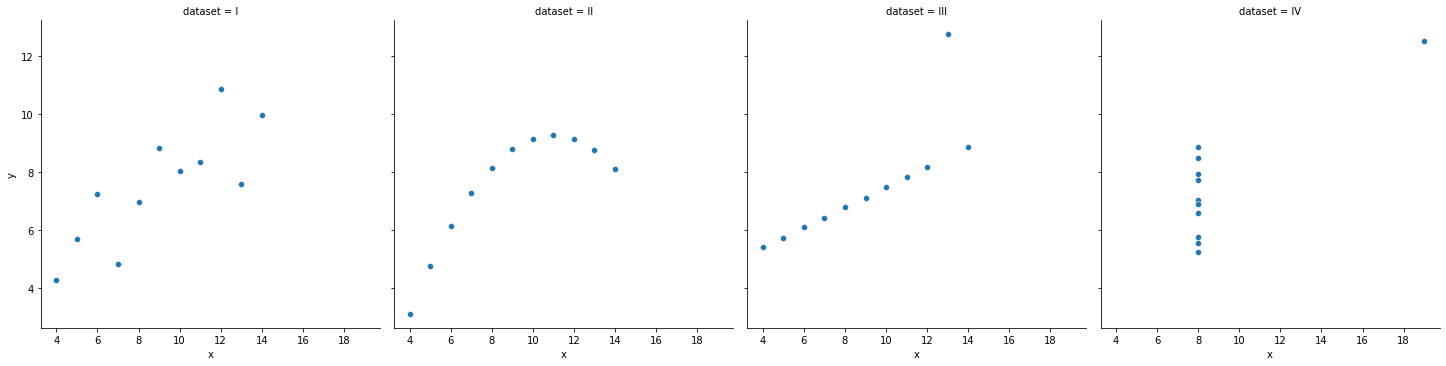

In [4]:
sns.relplot(x='x', y='y', col='dataset', data=df)

In [5]:
df.groupby("dataset").describe()

id                                                   x       ...  \
        count  mean       std   min   25%   50%   75%   max count mean  ...   
dataset                                                                 ...   
I        11.0   5.0  3.316625   0.0   2.5   5.0   7.5  10.0  11.0  9.0  ...   
II       11.0  16.0  3.316625  11.0  13.5  16.0  18.5  21.0  11.0  9.0  ...   
III      11.0  27.0  3.316625  22.0  24.5  27.0  29.5  32.0  11.0  9.0  ...   
IV       11.0  38.0  3.316625  33.0  35.5  38.0  40.5  43.0  11.0  9.0  ...   

                        y                                                      
          75%   max count      mean       std   min    25%   50%   75%    max  
dataset                                                                        
I        11.5  14.0  11.0  7.500909  2.031568  4.26  6.315  7.58  8.57  10.84  
II       11.5  14.0  11.0  7.500909  2.031657  3.10  6.695  8.14  8.95   9.26  
III      11.5  14.0  11.0  7.500000  2.030424  5.39  6.250  7.11  7.98  12.74  
IV        8.0  19.0  11.0  7.500909  2.030579  5.25  6.170  7.04  8.19  12.50  

[4 rows x 24 columns]

In [6]:
from pydataset import data

In [7]:
df = data('swiss')

In [8]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [9]:
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [10]:
df_stats = df.describe()

In [11]:
df_stats.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

In [12]:
df_stats

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [13]:
#histograms

<AxesSubplot:>

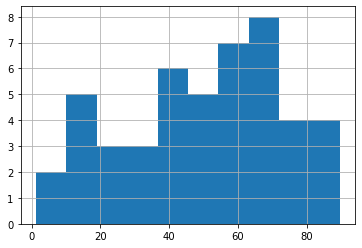

In [14]:
df['Agriculture'].hist()

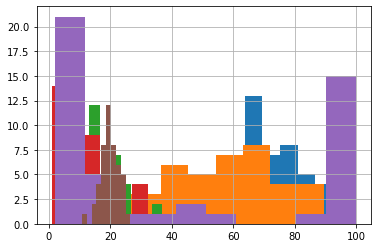

In [15]:
for col in df.columns:
    if np.issubdtype(df[col].dtype,np.number):
        df[col].hist()
       

Fertility


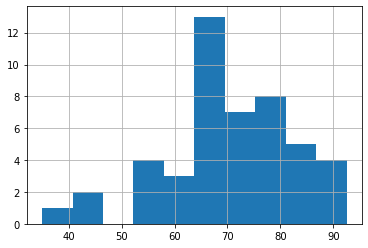

Agriculture


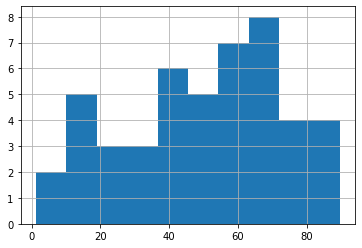

Examination


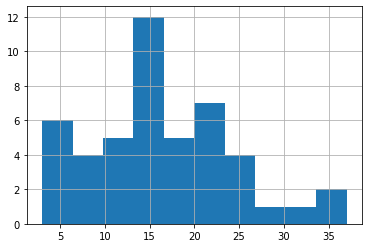

Education


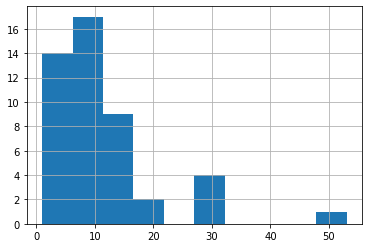

Catholic


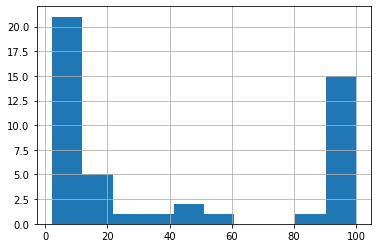

Infant.Mortality


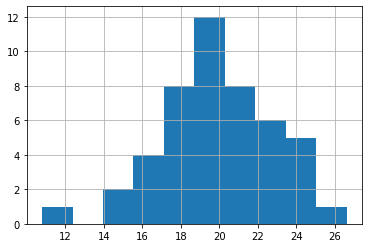

In [16]:
#visualize independently
for col in df.columns:
    if np.issubdtype(df[col].dtype,np.number):
        df[col].hist()
        print(col)
        plt.show()

In [17]:
df.shape

(47, 6)

In [18]:
# box plots
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Infant.Mortality'>

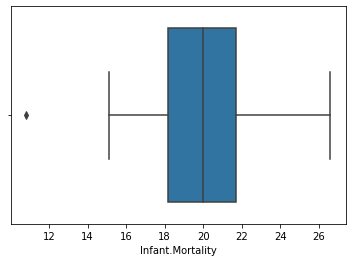

In [19]:
sns.boxplot(df['Infant.Mortality'])

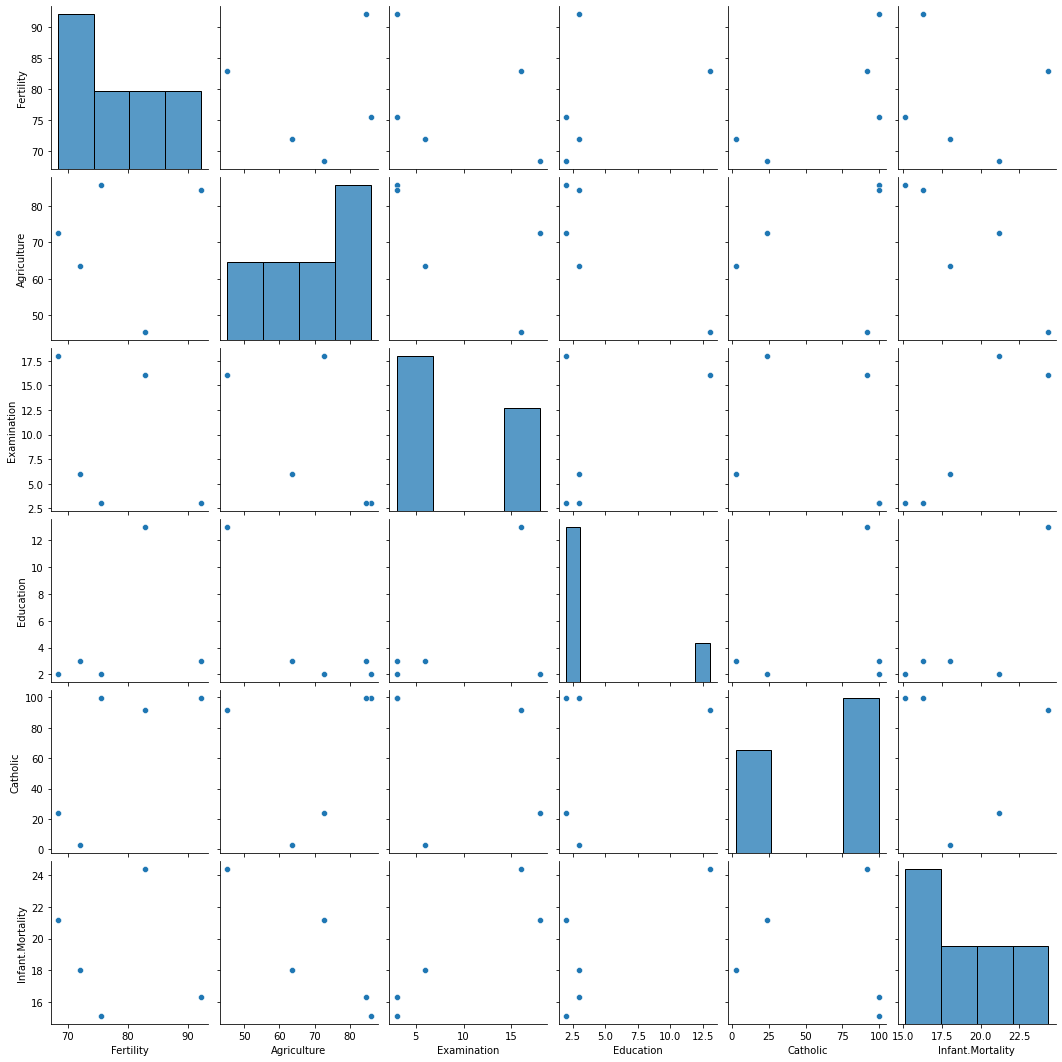

In [20]:
sns.pairplot(df.sample(5))

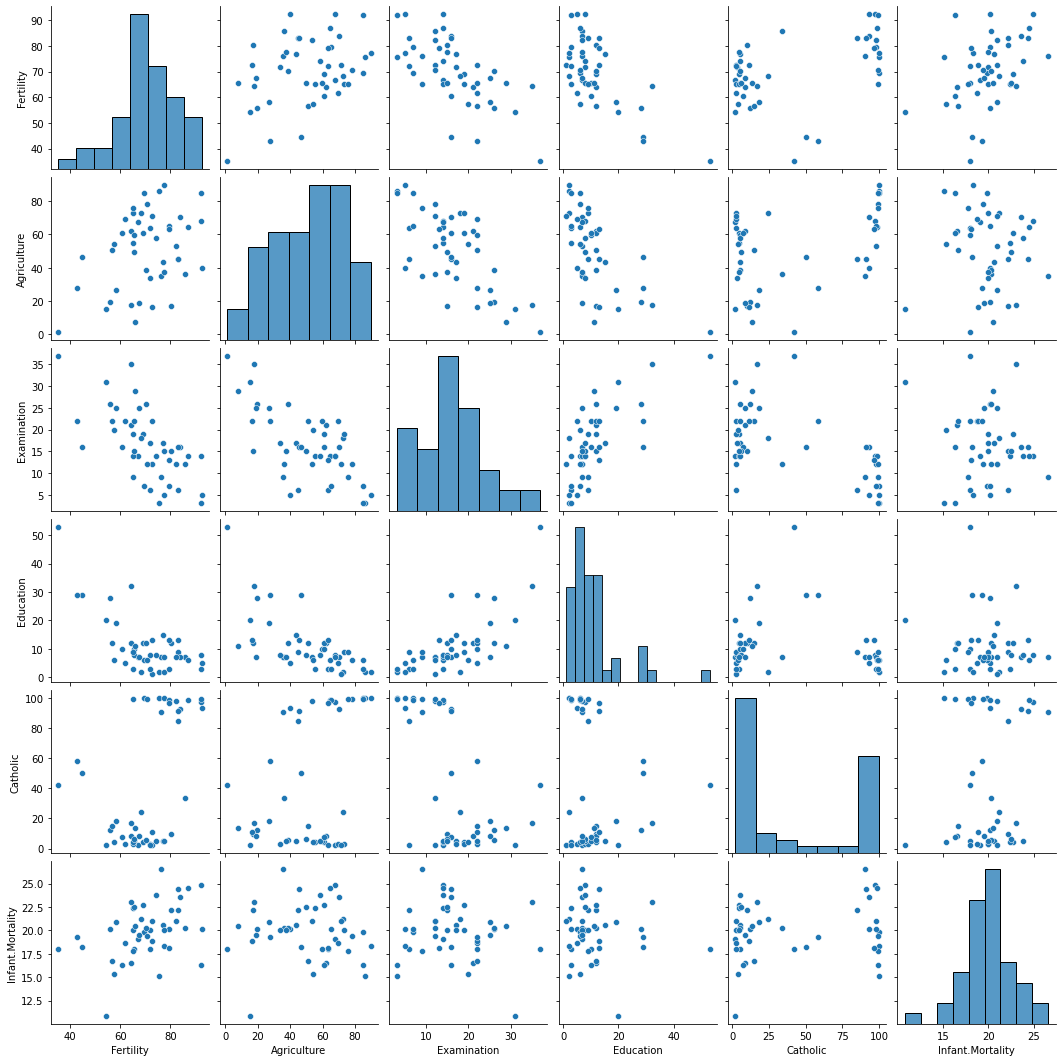

In [21]:
sns.pairplot(df)

## Using IQR

In [22]:
df_stats.Examination

count    47.000000
mean     16.489362
std       7.977883
min       3.000000
25%      12.000000
50%      16.000000
75%      22.000000
max      37.000000
Name: Examination, dtype: float64

In [23]:
q1 = df.Examination.quantile(0.25)

In [24]:
q1

12.0

In [25]:
q3 = df.Examination.quantile(0.75)

In [26]:
q3

22.0

##### 

In [27]:
iqr = q3 - q1

In [28]:
multiplier = 1.5
inner_lower_fence = q1 - (multiplier * iqr)
inner_upper_fence = q3 + (multiplier * iqr)

In [29]:
df[(df['Examination'] < inner_lower_fence) | (df['Examination'] > inner_upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality


In [30]:
#Infant mortality
zscores = pd.Series((x - x.mean()) / x.std())

NameError: name 'x' is not defined

In [ ]:
z_scores = pd.Series((df['Infant.Mortality'] - df['Infant.Mortality'].mean()) / df['Infant.Mortality'].std())

In [ ]:
df['z_scores_inf'] = z_scores

In [ ]:
df[df['z_scores_inf'].abs() >= 2]

In [ ]:
q1 = df['Infant.Mortality'].quantile(0.25)

In [ ]:
q1

In [ ]:
q3 = df['Infant.Mortality'].quantile(0.75)

In [ ]:
q3

In [ ]:
iqr = q3 - q1

In [ ]:
multiplier = 2.2
outer_lower_fence = q1 - (multiplier * iqr)
outer_upper_fence = q3 + (multiplier * iqr)

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. 
    - The first argument is a pandas Series. 
    - The second argument is the multiplier, which should have a default argument of 1.5.



In [31]:
def get_lower_and_upper_bounds(df_col, multiplier= 1.5):
    '''
    This fucntion uses the IQR multiplier formula to determine value for upper and lower
    outliers. Returns lower_bound and upper_bound.
    '''
    # determine first and third quartile of column
    q1 = df_col.quantile(.25)
    q3 = df_col.quantile(.75)
    # calculate inner quartile range
    iqr = q3 - q1
    
    # calculate bounds for outliers
    lower_bound = q1 - (iqr * multiplier)
    upper_bound = q3 + (iqr * multiplier)
    
    return lower_bound, upper_bound

In [ ]:
#walkthough solution


 1. **Using lemonade.csv dataset and focusing on continuous variables:**

    * Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
    * Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
  




In [56]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv", index_col=0)

In [57]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
1/1/17,Sunday,27.0,2.00,15,0.5,10
1/2/17,Monday,28.9,1.33,15,0.5,13
1/3/17,Tuesday,34.5,1.33,27,0.5,15
1/4/17,Wednesday,44.1,1.05,28,0.5,17
1/5/17,Thursday,42.4,1.00,33,0.5,18


In [58]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [35]:
df = df.drop("Price", axis=1)

In [36]:
df.head()

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
1/1/17,Sunday,27.0,2.00,15,10
1/2/17,Monday,28.9,1.33,15,13
1/3/17,Tuesday,34.5,1.33,27,15
1/4/17,Wednesday,44.1,1.05,28,17
1/5/17,Thursday,42.4,1.00,33,18


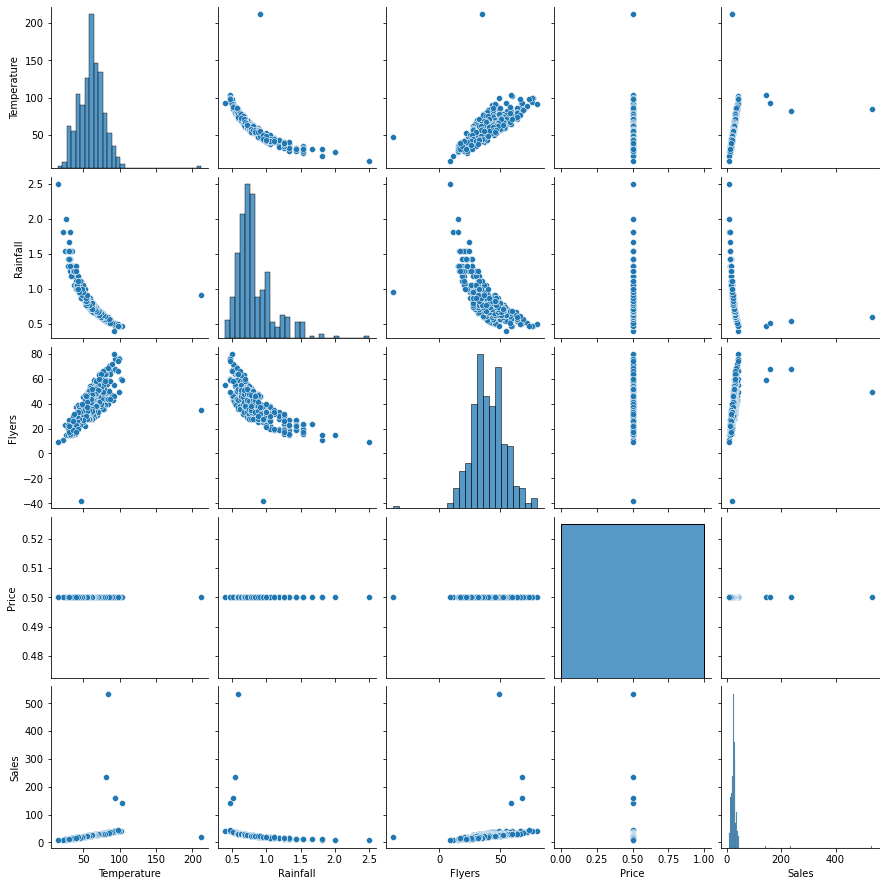

In [60]:
#Visualize
sns.pairplot(df)

Temperature
lower bound: 16.700000000000003
upper_bound: 104.7 



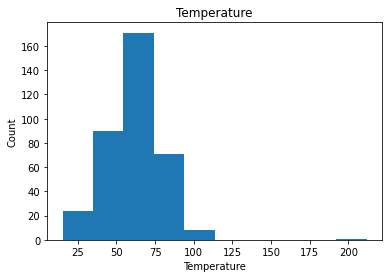

Rainfall
lower bound: 0.26
upper_bound: 1.3 



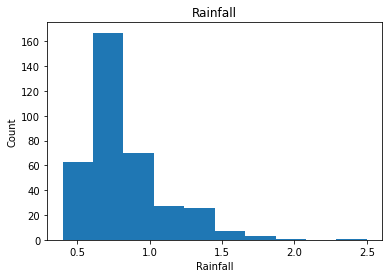

Flyers
lower bound: 4.0
upper_bound: 76.0 



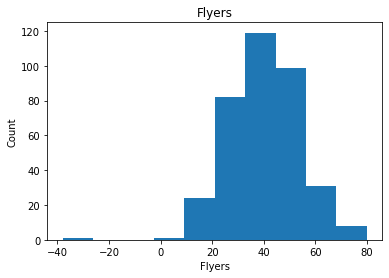

Sales
lower bound: 5.0
upper_bound: 45.0 



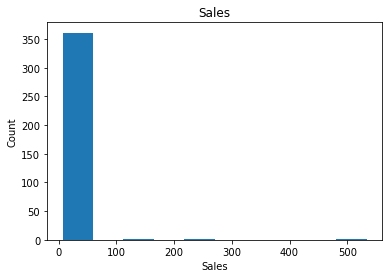

In [37]:
#Visualize 
for col in df.describe().columns:
    
    print(col)
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## <font color ="purple">Outliers Using 1.5 Rule Takeaways</font>
* Temperatue
    - Outliers make sense here
    - There do not appear to be any lower outliers
    - Would remove recordings over 200
* Rainfall
     - Low outliers here would not make sense unless rainfall was less than 0
     - Upper outliers should be kept as there could be rainfall more than average and still be legit
* Flyers
    - Should not have negative flyers observations
    - Should remove lower outliers
* Sales
    - Lower outliers do not make sense.
    - Upperoutliers would makee sense with a higher multiplier 

## <font color="blue">Outliers Using 3 Rule</font>

 * Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

* Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

Temperature
lower bound: -16.299999999999997
upper_bound: 137.7 



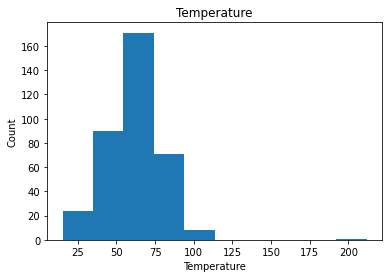

Rainfall
lower bound: -0.13
upper_bound: 1.69 



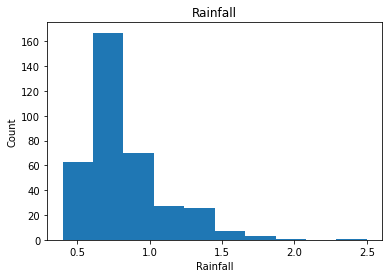

Flyers
lower bound: -23.0
upper_bound: 103.0 



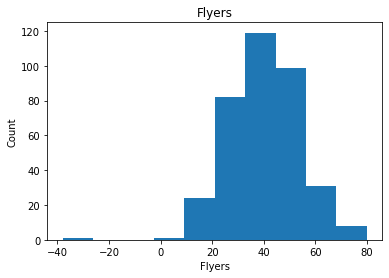

Sales
lower bound: -10.0
upper_bound: 60.0 



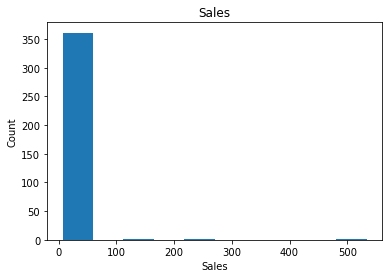

In [38]:
#tweaked to uses multiplier of 3
for col in df.describe().columns:
    
    print(col)
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier=3)
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


## <font color ="purple">Outliers Using 1.5 Rule Takeaways</font>
* Temperatue
    - Better with the 1.5 multiplier
    
* Rainfall 
     - Better with multiplier of 3
    - Would keep all data points
* Flyers
    - 0 as lower bound would work better but would use all other data point.
* Sales
    - Would be best to use mulitplier of 3 for the upper bound and keep lowers.

2. **Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns:**
    * Use a 2 sigma decision rule to isolate the outliers.
    * Do these make sense?
    * Should certain outliers be kept or removed?


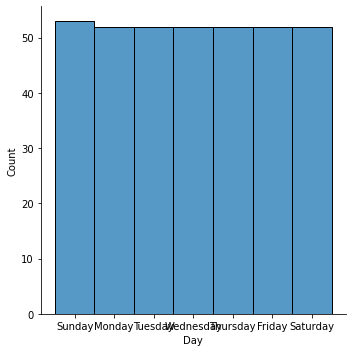

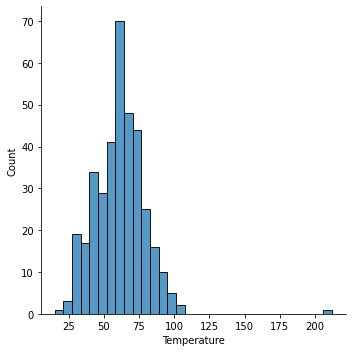

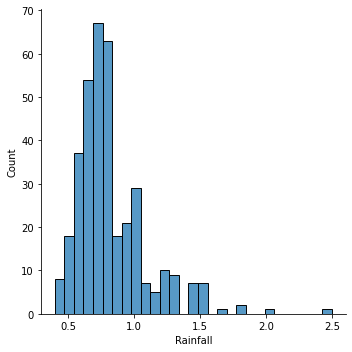

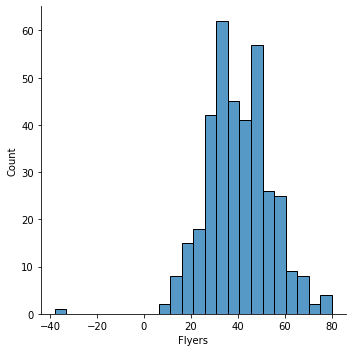

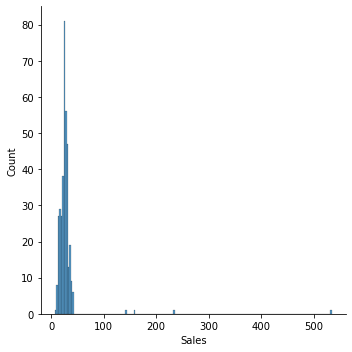

In [39]:
for col in df.columns:
    sns.displot(df[col])

<Figure size 864x720 with 0 Axes>

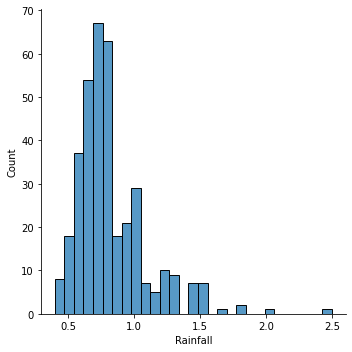

<Figure size 864x720 with 0 Axes>

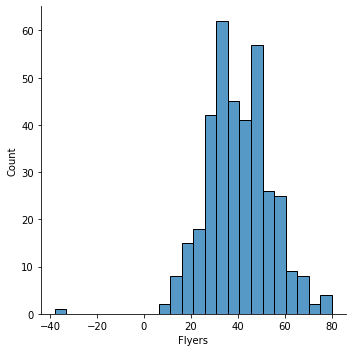

<Figure size 864x720 with 0 Axes>

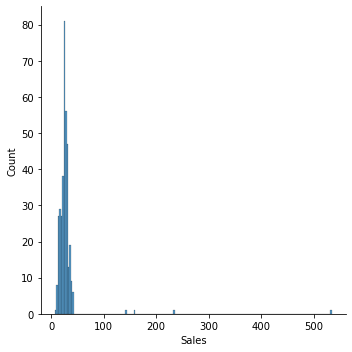

In [43]:
#normally distribyuted columns are Temp, Rainfall, and Flyers
for col in df.iloc[:,2:]:
    plt.figure(figsize=(12,10))
    sns.displot(df[col])
    plt.show()

In [44]:
df.describe()

,Temperature,Rainfall,Flyers,Sales
count,365.000000,365.000000,365.000000,365.000000
mean,61.224658,0.825973,40.104110,27.865753
std,18.085892,0.273890,13.786445,30.948132
min,15.100000,0.400000,-38.000000,7.000000
25%,49.700000,0.650000,31.000000,20.000000
50%,61.100000,0.740000,39.000000,25.000000
75%,71.700000,0.910000,49.000000,30.000000
max,212.000000,2.500000,80.000000,534.000000


In [45]:
#Use a 2 sigma decision rule to isolate the outliers.
def sigma_outliers(df, col_name, sigma):
    x = df[col_name]
    zscores = pd.Series((x - x.mean()) / x.std())
    return df[zscores.abs() >= sigma]

In [46]:
sigma_outliers(df, 'Temperature', 2)

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
2/11/17,Saturday,212.0,0.91,35,21
6/16/17,Friday,99.3,0.47,77,41
6/26/17,Monday,102.6,0.47,60,42
7/1/17,Saturday,102.9,0.47,59,143
7/10/17,Monday,98.0,0.49,66,40
7/18/17,Tuesday,99.3,0.47,76,41
7/22/17,Saturday,99.6,0.47,49,42
7/27/17,Thursday,97.9,0.47,74,43
12/5/17,Tuesday,22.0,1.82,11,10


In [47]:
sigma_outliers(df, 'Rainfall', 2)

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
1/1/17,Sunday,27.0,2.00,15,10
1/6/17,Friday,25.3,1.54,23,11
1/7/17,Saturday,32.9,1.54,19,13
1/11/17,Wednesday,32.6,1.54,23,12
1/16/17,Monday,30.6,1.67,24,12
1/17/17,Tuesday,32.2,1.43,26,14
1/20/17,Friday,31.6,1.43,20,12
1/24/17,Tuesday,28.6,1.54,20,12
12/4/17,Monday,34.9,1.54,16,13


In [48]:
sigma_outliers(df, 'Flyers', 2)

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
6/16/17,Friday,99.3,0.47,77,41
6/20/17,Tuesday,85.1,0.54,70,37
6/21/17,Wednesday,94.3,0.47,76,41
7/2/17,Sunday,93.4,0.51,68,158
7/3/17,Monday,81.5,0.54,68,235
7/14/17,Friday,92.0,0.50,80,40
7/18/17,Tuesday,99.3,0.47,76,41
7/23/17,Sunday,89.1,0.51,72,37
7/24/17,Monday,83.5,0.57,69,35


In [49]:
sigma_outliers(df, 'Sales', 2)

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
7/1/17,Saturday,102.9,0.47,59,143
7/2/17,Sunday,93.4,0.51,68,158
7/3/17,Monday,81.5,0.54,68,235
7/4/17,Tuesday,84.2,0.59,49,534


# <font color="purple">2 Sigma Rule Takeaways</font>
- Makes sense because it falls withing the rule of 95 percent of obervations falling within two standard deviations of the mean.
- Would still remove the negative flyers observations.

#### 3. **Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from 'lemonade.csv'**

In [50]:
sigma_outliers(df, 'Temperature', 3)

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
2/11/17,Saturday,212.0,0.91,35,21


In [51]:
sigma_outliers(df, 'Rainfall', 3)

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
1/1/17,Sunday,27.0,2.00,15,10
1/16/17,Monday,30.6,1.67,24,12
12/5/17,Tuesday,22.0,1.82,11,10
12/10/17,Sunday,31.3,1.82,15,11
12/31/17,Sunday,15.1,2.50,9,7


In [52]:
sigma_outliers(df, 'Flyers', 3)

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
11/21/17,Tuesday,47.0,0.95,-38,20


In [53]:
sigma_outliers(df, 'Sales', 2)

,Day,Temperature,Rainfall,Flyers,Sales
Date,,,,,
7/1/17,Saturday,102.9,0.47,59,143
7/2/17,Sunday,93.4,0.51,68,158
7/3/17,Monday,81.5,0.54,68,235
7/4/17,Tuesday,84.2,0.59,49,534
